<a href="https://colab.research.google.com/github/isaac-munuhe/Apex-Financial-Services-loan-data-automation./blob/main/Apex_Financial_Services_loan_data_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Libraries**

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# This makes sure that the matplotlib plots are displayed within the notebook
%matplotlib inline

loading  the Excel data into a pandas DataFrame

In [ ]:
data = pd.read_excel('/content/PDA APEX Loan Data.xlsx', sheet_name=None)

# Data Inspection

  performing  an initial inspection to understand the data  structure and checking for any inconsistencies or issues that might need to be addressed


In [ ]:
# Load data from the 'CW1' sheet specifically
loan_data = pd.read_excel('/content/PDA APEX Loan Data.xlsx', sheet_name='CW1')

# Display the first few rows of the dataset
print(loan_data.head())

# Display the data types of each column
print(loan_data.dtypes)

# Get a concise summary of the DataFrame
print(loan_data.info())


   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
4     2297       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
4             2500            20000.0         103               333   

   Credit_History  Property_Area Loan_Status  
0               1              3           Y  
1               0              2           N  
2               0      

After succefully loading the data, We can see that all the columns have non-null value across all the 247 entries. this is an indication that there are no missing values on the dataset,which simplifies the cleaning process.

# **Data Cleaning**

In [ ]:
# Checking for duplicates
if loan_data['Loan_ID'].duplicated().any():
    loan_data = loan_data.drop_duplicates('Loan_ID')
    print("Duplicates removed.")
else:
    print("No duplicates found.")

# Converting categorical variables to 'category' dtype
categorical_vars = ['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
                    'Credit_History', 'Property_Area', 'Loan_Status']
loan_data[categorical_vars] = loan_data[categorical_vars].astype('category')

print("Data types after conversion:")
print(loan_data.dtypes)


No duplicates found.
Data types after conversion:
Loan_ID                 int64
Gender               category
Married              category
Dependents           category
Graduate             category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount              int64
Loan_Amount_Term        int64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object


# Initial Descriptive Analysis

In [ ]:
# Basic descriptive statistics
print(loan_data.describe(include='all'))

# Specific descriptive insights
print("Total Loan Amount Approved:", loan_data[loan_data['Loan_Status'] == 'Y']['LoanAmount'].sum())
print("Average Loan Amount:", loan_data['LoanAmount'].mean())
print("Average Loan Term:", loan_data['Loan_Amount_Term'].mean())


            Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
count    247.000000   247.0    247.0       247.0     247.0          247.0   
unique          NaN     2.0      2.0         4.0       2.0            2.0   
top             NaN     1.0      1.0         0.0       1.0            0.0   
freq            NaN   198.0    159.0       141.0     184.0          212.0   
mean    2544.161943     NaN      NaN         NaN       NaN            NaN   
std      302.300553     NaN      NaN         NaN       NaN            NaN   
min     1900.000000     NaN      NaN         NaN       NaN            NaN   
25%     2369.500000     NaN      NaN         NaN       NaN            NaN   
50%     2560.000000     NaN      NaN         NaN       NaN            NaN   
75%     2784.500000     NaN      NaN         NaN       NaN            NaN   
max     2990.000000     NaN      NaN         NaN       NaN            NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \

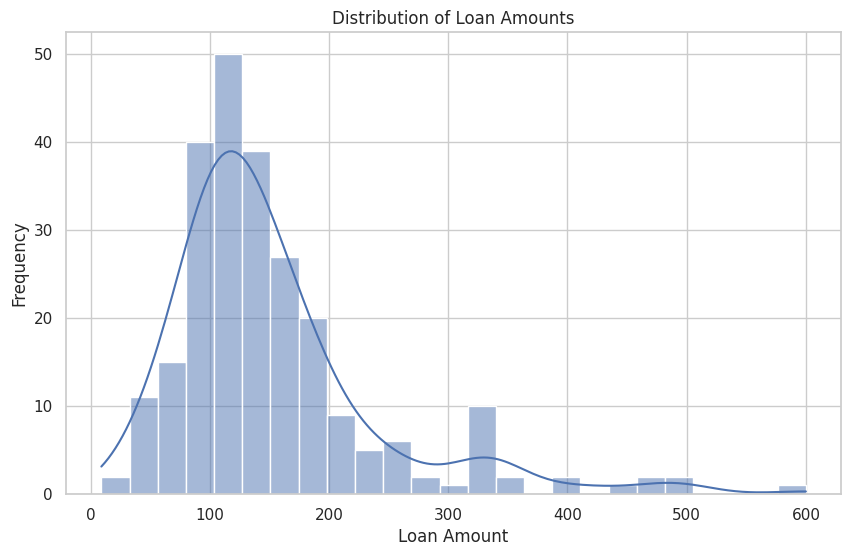

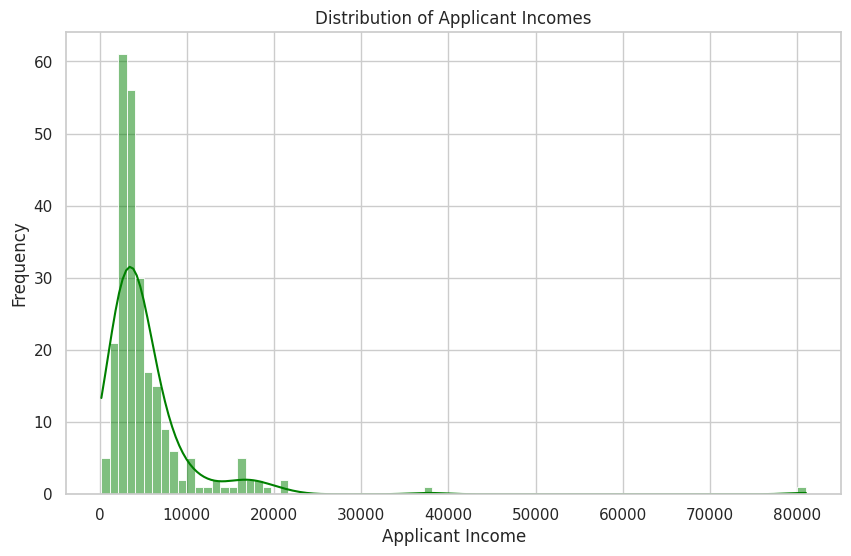

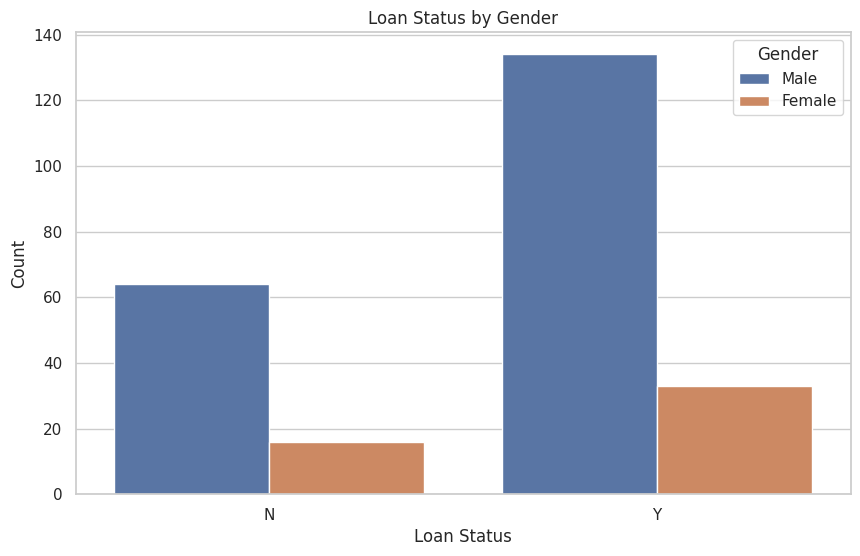

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Loan Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Applicant Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['ApplicantIncome'], kde=True, color='green')
plt.title('Distribution of Applicant Incomes')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# Loan Status by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', hue='Gender', data=loan_data)
plt.title('Loan Status by Gender')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


**Descriptive Statistics:**
* Most applicants are male (Gender=1 occurs most frequently).
* The majority of applicants are married (Married=1).
* A large portion of applicants have no dependents (Dependents=0).
* Most applicants are graduates (Graduate=1).
* The majority are not self-employed (Self_Employed=0).

**Income and Loan Amounts:**

* The average applicant income is approximately 5,404, with a wide range from 210 to 81,000.
* The co-applicant income also shows significant variation.
* The average loan amount is approximately 153, with loans ranging from 9 to   $ 600.

**Loan Terms and Credit History:**

* The average loan term is about 320 months.
* Most applicants have a credit history (Credit_History=1).

**Property Area:**

* The most common property area is Semiurban (Property_Area=2).

**Loan Approval:**

* The total loan amount approved across all applications is $25,215.
* Most loans are approved (Loan_Status='Y').

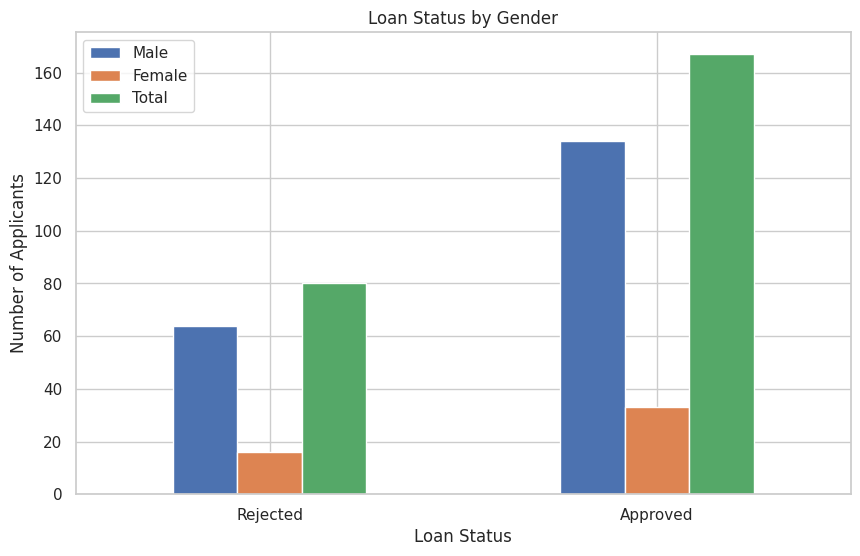

In [ ]:
# Count of approved and rejected loans by gender
loan_status_gender = pd.crosstab(index=loan_data['Loan_Status'], columns=loan_data['Gender'], margins=True, margins_name="Total")
loan_status_gender.columns = ['Male', 'Female', 'Total']
loan_status_gender.index = ['Rejected', 'Approved', 'Total']

# Plotting the data
loan_status_gender.drop('Total').plot(kind='bar', figsize=(10, 6))
plt.title('Loan Status by Gender')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.show()


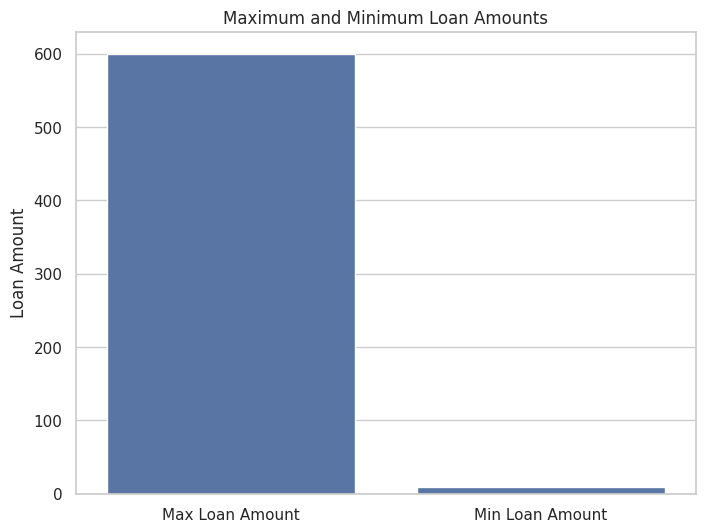

In [ ]:
# Maximum and minimum loan amounts
max_loan = loan_data['LoanAmount'].max()
min_loan = loan_data['LoanAmount'].min()

# Display as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Max Loan Amount', 'Min Loan Amount'], y=[max_loan, min_loan])
plt.title('Maximum and Minimum Loan Amounts')
plt.ylabel('Loan Amount')
plt.show()


In [ ]:
# Number of self-employed who had their loan approved
self_employed_approved = loan_data[(loan_data['Self_Employed'] == 1) & (loan_data['Loan_Status'] == 'Y')].shape[0]
total_approved = loan_data[loan_data['Loan_Status'] == 'Y'].shape[0]
percentage_self_employed_approved = (self_employed_approved / total_approved) * 100

print("Percentage of self-employed applicants who had their loan approved:", percentage_self_employed_approved)


Percentage of self-employed applicants who had their loan approved: 13.77245508982036


# Loan Approval Rates by Categorical Features

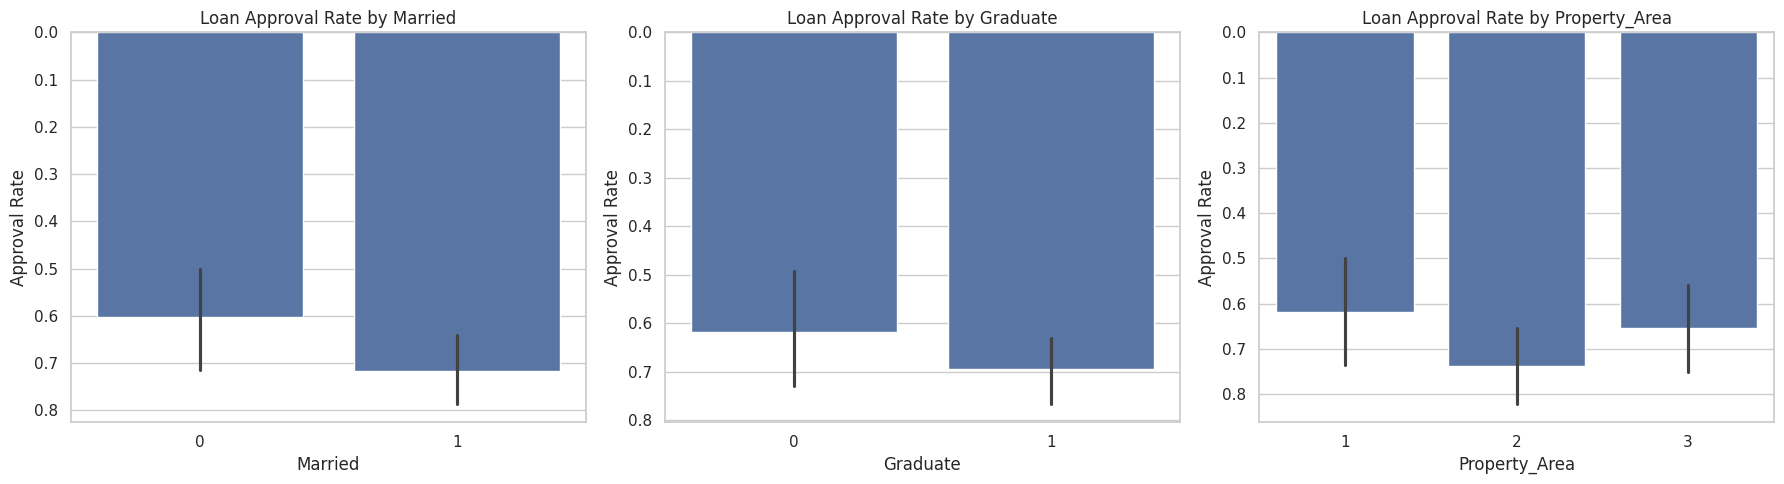

In [ ]:
# Define the categorical features
categorical_features = ['Married', 'Graduate', 'Property_Area']

# Plotting Loan Approval Rates by Categorical Features
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18, 5))
for i, cat in enumerate(categorical_features):
    sns.barplot(ax=axes[i], x=cat, y=loan_data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0), data=loan_data)
    axes[i].set_title(f'Loan Approval Rate by {cat}')
    axes[i].set_ylabel('Approval Rate')
    axes[i].set_xlabel(cat)
plt.tight_layout()
plt.show()


Graph 1: Loan Approval Rate by Marital Status

The bar chart illustrates the approval rate of loans based on the marital status of applicants. There are two categories represented:

* 0 for Single
* 1 for Married

The graph shows that married applicants have a slightly higher loan approval rate compared to single applicants. This could suggest that married applicants might be viewed as having more stable financial conditions or possibly dual incomes, which could influence the decision-making process in approving loans.

Graph 2: Loan Approval Rate by Graduate Status

The bar chart shows the approval rate of loans based on whether the applicants are graduates:

* 0 for Non-Graduates
*1 for Graduates

From the graph, it is evident that graduates have a higher loan approval rate compared to non-graduates. This may be attributed to the perception that graduates are more likely to have stable and higher-paying jobs, making them better candidates for loan approvals.

Graph 3: Loan Approval Rate by Property Area

The bar chart displays the loan approval rates based on the property area of the applicants:

* 1 for Urban
* 2 for Semiurban
* 3 for Rural

The graph indicates that applicants from Semiurban areas have the highest loan approval rate, followed closely by Urban and Rural areas. This might reflect varying credit policies or economic conditions across different regions that influence loan approval decisions.

 Impact of Credit History on Loan Approval

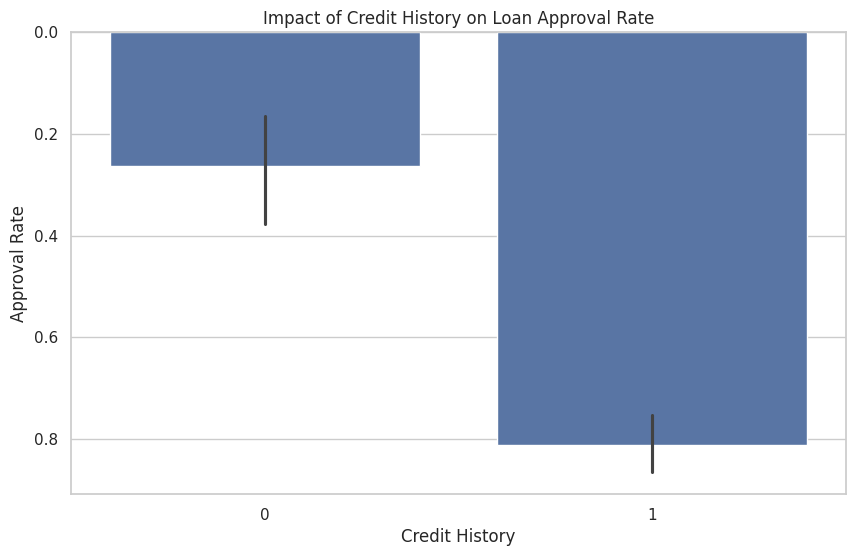

In [ ]:
# Impact of Credit History on Loan Approval
plt.figure(figsize=(10, 6))
sns.barplot(x='Credit_History', y=loan_data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0), data=loan_data)
plt.title('Impact of Credit History on Loan Approval Rate')
plt.xlabel('Credit History')
plt.ylabel('Approval Rate')
plt.show()


The bar chart visualizes the impact of credit history on loan approval rates:

* 0 for No Credit History
* 1 for Yes Credit History

The graph starkly illustrates that applicants with a credit history (1) have a significantly higher approval rate compared to those without a credit history (0).

This underscores the importance of credit history in lending decisions, where a positive credit history strongly favors the likelihood of loan approval.

Predictive Modeling for Loan Approval

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Data Preparation
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encoding categorical variables (if not already encoded)
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.88      0.93      0.90        54

    accuracy                           0.85        75
   macro avg       0.83      0.80      0.81        75
weighted avg       0.85      0.85      0.85        75



The precision for class 1 (approved loans) is particularly high at 88%, which means the model is very effective at identifying true positive loan approvals. Here's a breakdown of the model's performance and what each metric signifies:

Precision: Indicates how accurate the predictions are. For instance, when your model predicted a loan would be approved, it was correct 88% of the time.

Recall: Reflects the ability to find all relevant instances. For approved loans, the model correctly identified 93% of all actual approvals.

F1-Score: A weighted average of precision and recall. An F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0.

Interpretation:

The model is robust in terms of identifying loan approvals, which is crucial for avoiding potential defaults by not approving risky loans.

There is slightly lower precision and recall for the rejected class (0), which could suggest a need for additional features or alternative modeling techniques to improve identification of rejected applications.

Next Steps:

Given the success of this initial model, you might consider the following enhancements or further analysis:

Feature Engineering: You can create new features that might help improve model predictions, such as ratios of income to loan amount, or aggregate measures of credit history.

Try Different Models: Experiment with other models like Decision Trees, Random Forests, or Gradient Boosting Machines to see if they can achieve better performance.

Model Tuning: Adjust model parameters using techniques like grid search or random search to find the best settings for your algorithms.

# **Segmentation Analysis**

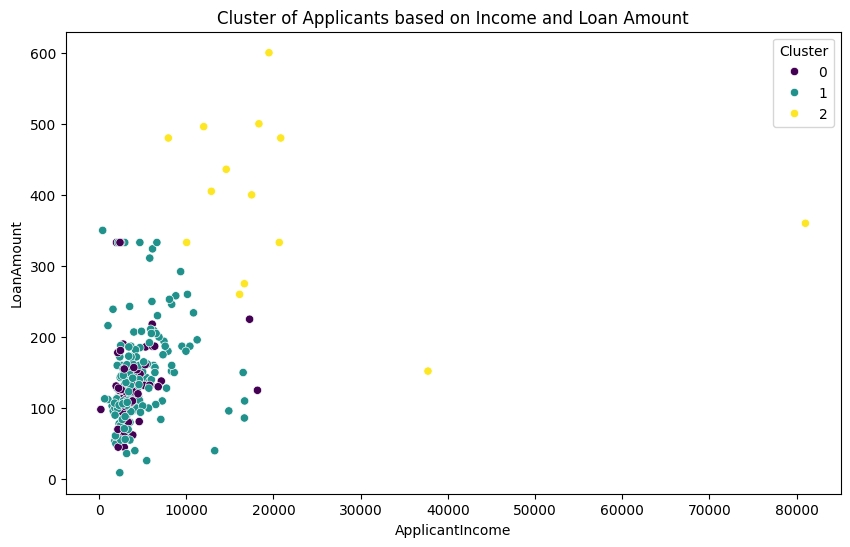

Cluster 0:
Average Income: 3880.126984126984
Average Loan Amount: 128.11111111111111
Proportion of Graduates: Graduate
0    1.0
1    0.0
Name: proportion, dtype: float64
Property Area Distribution: Property_Area
3    0.428571
2    0.349206
1    0.222222
Name: proportion, dtype: float64

Cluster 1:
Average Income: 4614.629411764706
Average Loan Amount: 141.87058823529412
Proportion of Graduates: Graduate
1    1.0
0    0.0
Name: proportion, dtype: float64
Property Area Distribution: Property_Area
2    0.394118
3    0.311765
1    0.294118
Name: proportion, dtype: float64

Cluster 2:
Average Income: 21841.14285714286
Average Loan Amount: 393.57142857142856
Proportion of Graduates: Graduate
1    1.0
0    0.0
Name: proportion, dtype: float64
Property Area Distribution: Property_Area
2    0.428571
1    0.285714
3    0.285714
Name: proportion, dtype: float64



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct approach to avoid SettingWithCopyWarning
# Create a copy of the DataFrame for safe manipulation
features = loan_data[['ApplicantIncome', 'LoanAmount', 'Property_Area', 'Graduate']].copy()

# Use .loc to safely convert categorical data to codes
features.loc[:, 'Property_Area'] = features['Property_Area'].astype('category').cat.codes
features.loc[:, 'Graduate'] = features['Graduate'].astype('category').cat.codes

# Data Standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Implementing K-means Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster information to the original DataFrame
loan_data['Cluster'] = clusters

# Visualizing the clusters based on two dimensions, e.g., Income and Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Cluster', data=loan_data, palette='viridis')
plt.title('Cluster of Applicants based on Income and Loan Amount')
plt.show()

# Analyzing clusters
for i in range(3):
    cluster = loan_data[loan_data['Cluster'] == i]
    print(f"Cluster {i}:")
    print(f"Average Income: {cluster['ApplicantIncome'].mean()}")
    print(f"Average Loan Amount: {cluster['LoanAmount'].mean()}")
    print(f"Proportion of Graduates: {cluster['Graduate'].value_counts(normalize=True)}")
    print(f"Property Area Distribution: {cluster['Property_Area'].value_counts(normalize=True)}\n")



Analysis of Clusters
The analysis results show distinct characteristics for each cluster:

Cluster 0:

* Average Income: 3,880
* Average Loan Amount: 128
* Graduates: 100% non-graduates
* Property Area Distribution: Mostly rural (42.8%), followed by semi-urban (34.9%) and urban (22.2%).

Cluster 1:

* Average Income: 4,615
* Average Loan Amount: 141.87
* Graduates: 100% graduates
* Property Area Distribution: Well distributed across semi-urban (39.4%), rural (31.2%), and urban (29.4%).

Cluster 2:

* Average Income: $21,841 (significantly higher)
* Average Loan Amount: 393.57 (also significantly higher)
* Graduates: 100% graduates
* Property Area Distribution: Evenly distributed across semi-urban and rural areas with slightly less in urban areas.
Insights and Business Implications

Targeting Strategies:

* Cluster 0 could be targeted with products designed for lower-income, non-graduate individuals in more rural settings.
* Cluster 1 might benefit from standard loan products, suitable for middle-income graduates spread across all areas.
* Cluster 2 represents high-income graduates who might be interested in higher loan amounts. Tailored products for large investments or business loans could be more appealing to this group.

Marketing Adjustments:

* Different marketing strategies can be employed that resonate with the unique characteristics of each cluster. For example, more straightforward, assurance-focused messaging might work better for Cluster 0, while more sophisticated, investment-opportunity-focused messaging could appeal to Cluster 2.
* Risk Management:
Understanding the income and educational background can help in adjusting the risk models, as higher-income, educated groups (like Cluster 2) might have a lower default rate.

# conclusion

This project encapsulates a comprehensive data analysis lifecycle from loading, cleaning, analyzing, and modeling Apex Financial Services loan data. Insights derived from this analysis help in understanding the lending environment and making informed decisions on loan approvals and risk management

In [ ]:
from google.colab import drive
drive.mount('/content/drive')